## Sampling
#### Read employees.csv file.
#### Display column counts.
#### Remove any row contains null and display column counts

In [14]:
import pandas as pd

df = pd.read_csv('employees.csv')
df.count()

First Name            933
Gender                855
Start Date           1000
Last Login Time      1000
Salary               1000
Bonus %              1000
Senior Management     933
Team                  957
dtype: int64

In [15]:
df.dropna(inplace = True)
df.count()

First Name           764
Gender               764
Start Date           764
Last Login Time      764
Salary               764
Bonus %              764
Senior Management    764
Team                 764
dtype: int64

## Simple Random Sample (SRS)
#### Select simple random sample of size=50.
#### Select 50% SRS.
#### Display column counts in both cases.

In [16]:
import random

SRS = df.sample(50)
SRS.count()

First Name           50
Gender               50
Start Date           50
Last Login Time      50
Salary               50
Bonus %              50
Senior Management    50
Team                 50
dtype: int64

In [17]:
sample = df.sample( round(df.shape[0]*0.5))
sample.count()

First Name           382
Gender               382
Start Date           382
Last Login Time      382
Salary               382
Bonus %              382
Senior Management    382
Team                 382
dtype: int64

## Systematic Sampling
#### Select a systematic sample with 25, 50, and 100 intervals.

In [18]:
df.reset_index(inplace = True, drop = True)

In [19]:
def systematicSampling(dataframe, interval):
    size = dataframe.shape[0]
    indexes = [i for i in range(0,size,interval)]
    return dataframe.iloc[indexes]

In [20]:
sample = systematicSampling(df,25)
sample.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
25,Theresa,Female,10/10/2006,1:12 AM,85182,16.675,False,Sales
50,Jose,Male,10/30/2004,1:39 PM,84834,14.330,True,Finance
75,Aaron,Male,2/17/2012,10:20 AM,61602,11.849,True,Marketing
100,Shirley,Female,5/1/1984,1:15 PM,41334,6.219,True,Human Resources


In [21]:
sample = systematicSampling(df,50)
sample.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
50,Jose,Male,10/30/2004,1:39 PM,84834,14.330,True,Finance
100,Shirley,Female,5/1/1984,1:15 PM,41334,6.219,True,Human Resources
150,Carolyn,Female,11/6/2012,3:51 AM,69268,3.031,False,Client Services
200,Gloria,Female,3/27/2007,1:44 AM,90730,2.491,False,Distribution


In [22]:
sample = systematicSampling(df,100)
sample.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
100,Shirley,Female,5/1/1984,1:15 PM,41334,6.219,True,Human Resources
200,Gloria,Female,3/27/2007,1:44 AM,90730,2.491,False,Distribution
300,Marilyn,Female,8/15/1989,9:14 AM,140502,9.989,True,Sales
400,Catherine,Female,8/31/2013,7:24 PM,58047,14.858,True,Distribution


## Stratified Sampling
#### Perform a countplot and pieplot for Gender column.
#### Select 20% startified sample from data based on Gender.
#### Perform a countplot and pieplot for Gender column for the data sample.

In [23]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
2,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
3,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
4,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


,index,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
2,3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
3,4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
4,5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


<AxesSubplot: xlabel='Gender', ylabel='count'>

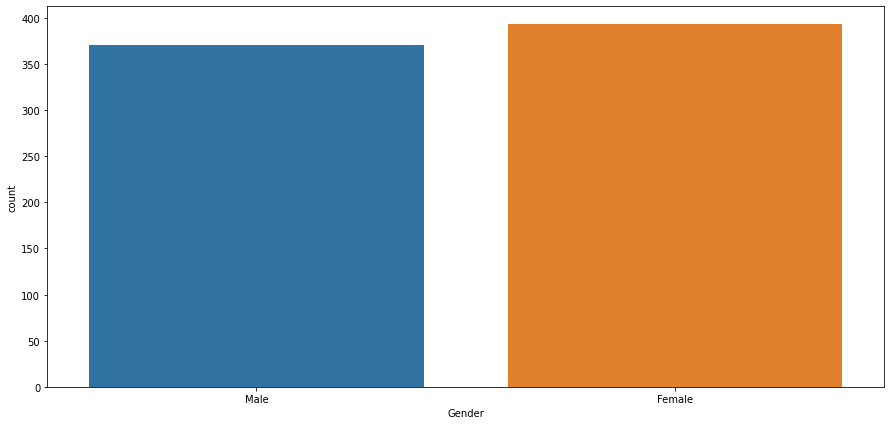

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'Gender')

In [25]:
pd.DataFrame(df['Gender'].value_counts())

,Gender
Female,393
Male,371


<AxesSubplot: ylabel='Gender'>

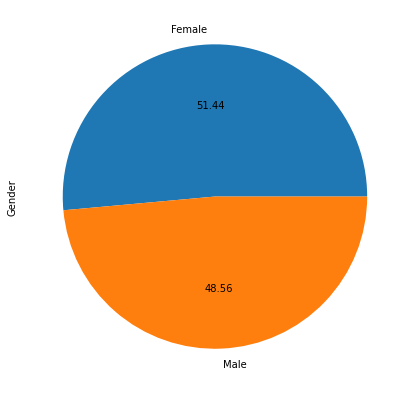

In [26]:
plt.figure(figsize = (15,7))
df['Gender'].value_counts().plot(kind = 'pie', autopct='%.2f')
## another way to do it ?

In [27]:
from sklearn.model_selection import train_test_split
sample,_ = train_test_split(df,stratify = df['Gender'] , train_size = 0.2)
sample.shape

(152, 8)

In [28]:
sample.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
426,Anne,Female,10/26/1996,8:09 PM,71930,18.451,True,Product
10,Gary,Male,1/27/2008,11:40 PM,109831,5.831,False,Sales
174,Sarah,Female,9/14/1995,7:50 AM,87298,2.311,False,Distribution
450,Jack,Male,5/30/2012,3:17 AM,70367,18.266,True,Legal
323,Victor,Male,9/24/2005,12:04 PM,123144,16.261,True,Product


<AxesSubplot: xlabel='Gender', ylabel='count'>

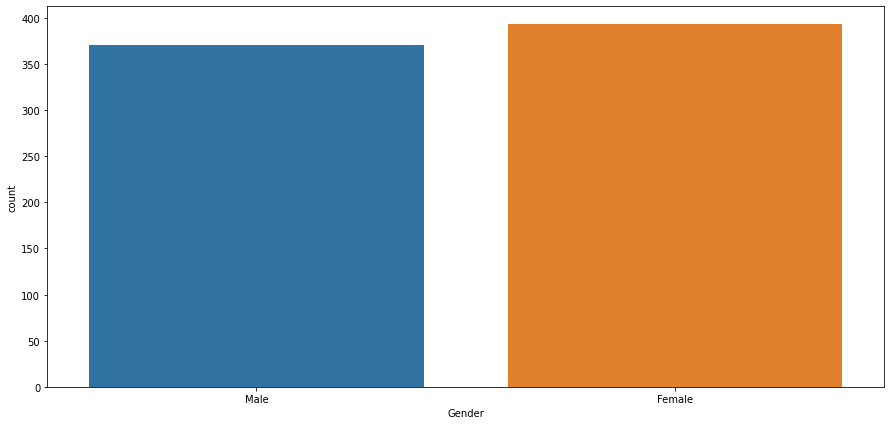

In [29]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

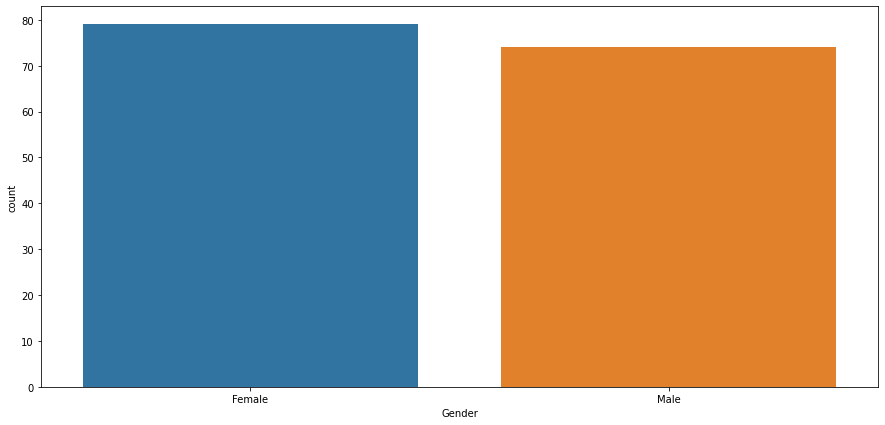

<AxesSubplot: ylabel='Gender'>

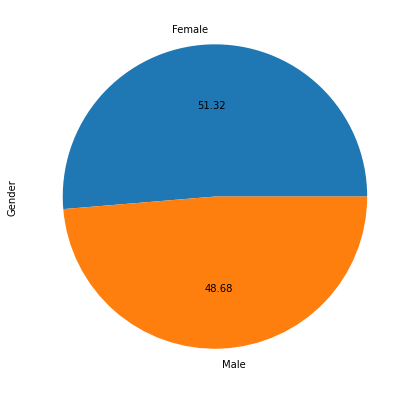

In [30]:
plt.figure(figsize = (15,7))
sample['Gender'].value_counts().plot(kind = 'pie', autopct='%.2f')
## another way to do it ?

## Sampling Distributions and CLT
### Take a 10000 samples of sizes 1, 5, 10, 50 from a continuous uniform distribution a=1, b=11. Plot the sampling distribution of the sample mean.
### Calculate mean and variance of sampling distribution.
### Repeat for any distribution of your choice.
##### Hint: fix the scale of x-axis to be able to notice the difference.

<AxesSubplot: ylabel='Count'>

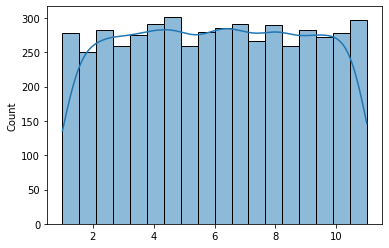

In [31]:
import numpy as np
x = np.random.uniform(1,11, size = 5000)
sns.histplot(data = x, kde = True)

Population mean:  6.037766564146418  , var:  8.291871952516775
Sampling distribution mean:  6.033334883672498  , variance:  8.303801375010522


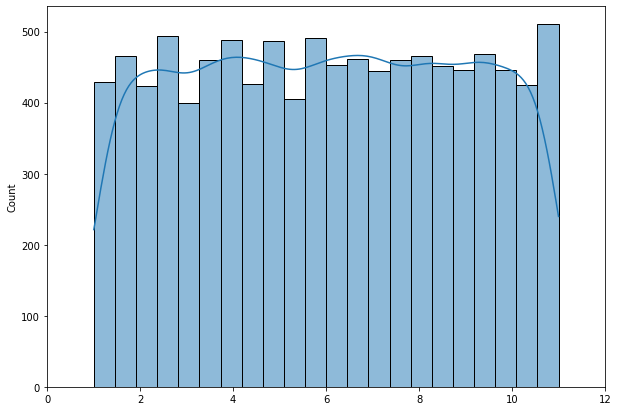

In [32]:
plt.figure(figsize = (10,7))
samples = []
for i in range(10000):
    samples.append(np.random.choice(x,1))
samples = [i.mean() for i in samples]
ax = sns.histplot(data = samples, kde = True)
ax.set_xlim(0,12);
print('Population mean: ', x.mean(), ' , var: ', x.var())
print('Sampling distribution mean: ', np.array(samples).mean(), ' , variance: ', np.array(samples).var())

Population mean:  6.037766564146418  , var:  8.291871952516775
Sampling distribution mean:  6.043729057894734  , variance:  1.6211030728512652


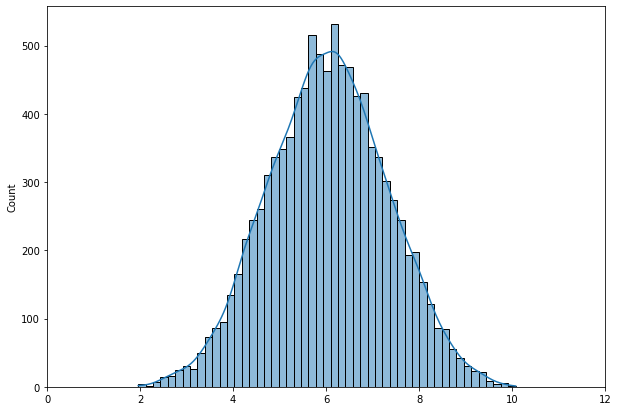

In [33]:
plt.figure(figsize = (10,7))
samples = []
for i in range(10000):
    samples.append(np.random.choice(x,5))
samples = [i.mean() for i in samples]
ax = sns.histplot(data = samples, kde = True)
ax.set_xlim(0,12);
print('Population mean: ', x.mean(), ' , var: ', x.var())
print('Sampling distribution mean: ', np.array(samples).mean(), ' , variance: ', np.array(samples).var())

Population mean:  6.037766564146418  , var:  8.291871952516775
Sampling distribution mean:  6.03541298341713  , variance:  0.843340301276187


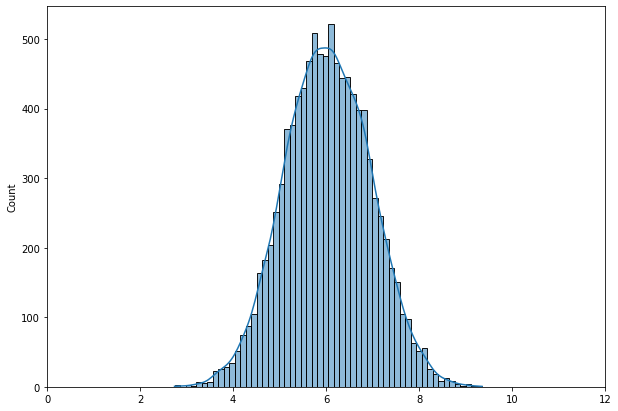

In [34]:
plt.figure(figsize = (10,7))
samples = []
for i in range(10000):
    samples.append(np.random.choice(x,10))
samples = [i.mean() for i in samples]
ax = sns.histplot(data = samples, kde = True)
ax.set_xlim(0,12);
print('Population mean: ', x.mean(), ' , var: ', x.var())
print('Sampling distribution mean: ', np.array(samples).mean(), ' , variance: ', np.array(samples).var())

Population mean:  6.037766564146418  , var:  8.291871952516775
Sampling distribution mean:  6.035376661105263  , variance:  0.16398827271782873


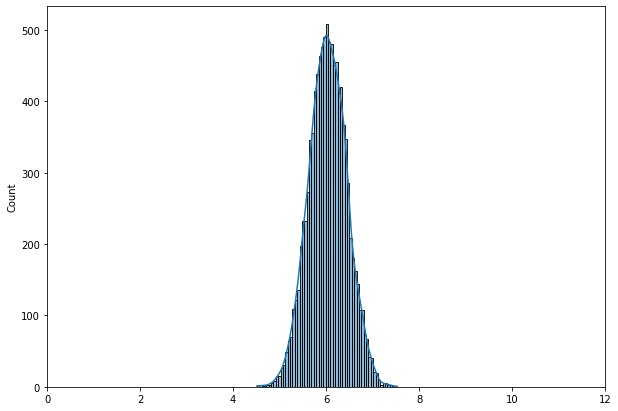

In [35]:
plt.figure(figsize = (10,7))
samples = []
for i in range(10000):
    samples.append(np.random.choice(x,50))
samples = [i.mean() for i in samples]
ax = sns.histplot(data = samples, kde = True)
ax.set_xlim(0,12);
print('Population mean: ', x.mean(), ' , var: ', x.var())
print('Sampling distribution mean: ', np.array(samples).mean(), ' , variance: ', np.array(samples).var())

### Repeat for any distribution of your choice.

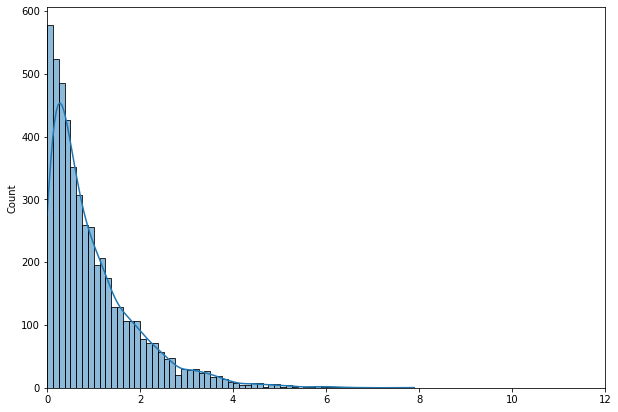

In [36]:
plt.figure(figsize = (10,7))
y = np.random.exponential(size = 5000)
ax = sns.histplot(data = y, kde = True)
ax.set_xlim(0,12);

Population mean:  0.9828081959101214  , var:  0.929394534511963
Sampling distribution mean:  0.9841998933512975  , variance:  0.9244109422592883


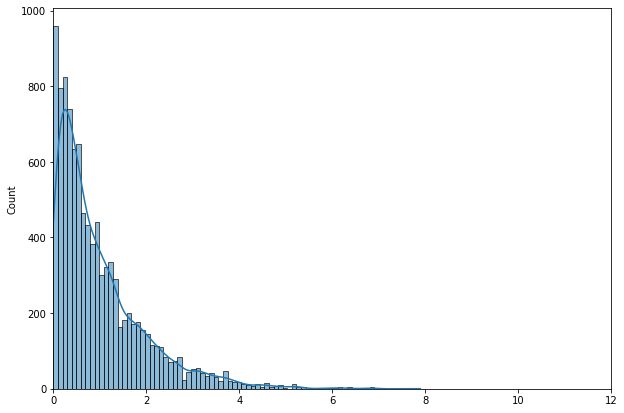

In [37]:
plt.figure(figsize = (10,7))
samples = []
for i in range(10000):
    samples.append(np.random.choice(y,1))
samples = [i.mean() for i in samples]
ax = sns.histplot(data = samples, kde = True)
ax.set_xlim(0,12);
print('Population mean: ', y.mean(), ' , var: ', y.var())
print('Sampling distribution mean: ', np.array(samples).mean(), ' , variance: ', np.array(samples).var())

Population mean:  0.9828081959101214  , var:  0.929394534511963
Sampling distribution mean:  0.9826736206128753  , variance:  0.18384604549604844


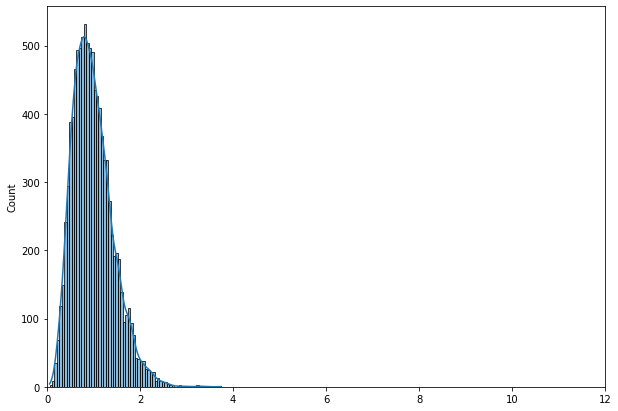

In [38]:
plt.figure(figsize = (10,7))
samples = []
for i in range(10000):
    samples.append(np.random.choice(y,5))
samples = [i.mean() for i in samples]
ax = sns.histplot(data = samples, kde = True)
ax.set_xlim(0,12);
print('Population mean: ', y.mean(), ' , var: ', y.var())
print('Sampling distribution mean: ', np.array(samples).mean(), ' , variance: ', np.array(samples).var())

Population mean:  0.9828081959101214  , var:  0.929394534511963
Sampling distribution mean:  0.9824428266519212  , variance:  0.0929688840195479


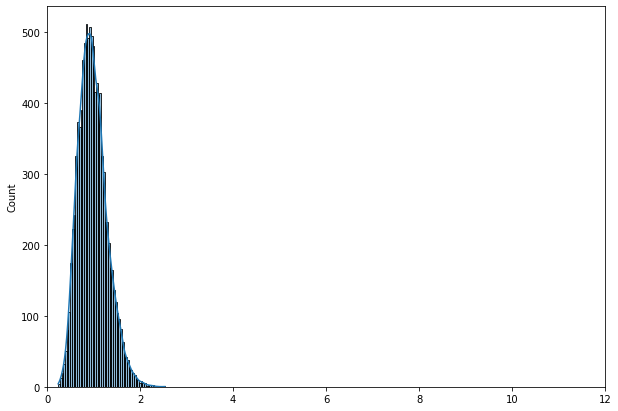

In [39]:
plt.figure(figsize = (10,7))
samples = []
for i in range(10000):
    samples.append(np.random.choice(y,10))
samples = [i.mean() for i in samples]
ax = sns.histplot(data = samples, kde = True)
ax.set_xlim(0,12);
print('Population mean: ', y.mean(), ' , var: ', y.var())
print('Sampling distribution mean: ', np.array(samples).mean(), ' , variance: ', np.array(samples).var())

Population mean:  0.9828081959101214  , var:  0.929394534511963
Sampling distribution mean:  0.9820586053264977  , variance:  0.018572931002236996


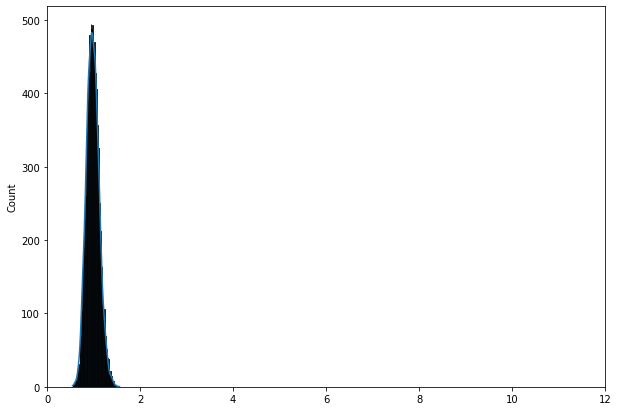

In [40]:
plt.figure(figsize = (10,7))
samples = []
for i in range(10000):
    samples.append(np.random.choice(y,50))
samples = [i.mean() for i in samples]
ax = sns.histplot(data = samples, kde = True)
ax.set_xlim(0,12);
print('Population mean: ', y.mean(), ' , var: ', y.var())
print('Sampling distribution mean: ', np.array(samples).mean(), ' , variance: ', np.array(samples).var())

## Confidence Interval (CI)
### Within how many standard deviations the estimated sample mean should be located for CIs 90%, 92%, 95%, 98%, 99%.   

In [41]:
from scipy.stats import norm
print('For CI 90%: within ', norm.ppf((0.9/2)+0.5), 'standad deviations')
print('For CI 90%: within ', norm.ppf((0.92/2)+0.5), 'standad deviations')
print('For CI 90%: within ', norm.ppf((0.95/2)+0.5), 'standad deviations')
print('For CI 90%: within ', norm.ppf((0.98/2)+0.5), 'standad deviations')
print('For CI 90%: within ', norm.ppf((0.99/2)+0.5), 'standad deviations')

For CI 90%: within  1.6448536269514722 standad deviations
For CI 90%: within  1.7506860712521692 standad deviations
For CI 90%: within  1.959963984540054 standad deviations
For CI 90%: within  2.3263478740408408 standad deviations
For CI 90%: within  2.5758293035489004 standad deviations


### Calculate the expected mean with 95% CI for each team for the employees data as follow:
##### Using z-value.
##### Using t-value.
##### Compare the results obtaind from the above calculation and write a conclusion.
##### Perform  sns.barplot() and check out the displayed confidence intervals. Compare with your results.

In [42]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
2,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
3,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
4,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


In [43]:
z = norm.ppf((0.95/2)+0.5)
z

1.959963984540054

In [44]:
stat_df = pd.DataFrame(df.groupby('Team')['Salary'].agg( ['mean', 'std','count'] ))
stat_df

,mean,std,count
Team,,,
Business Development,90520.397727,34003.949519,88
Client Services,89336.658824,31388.107545,85
Distribution,85849.100000,34591.228251,60
Engineering,94369.405063,33128.774280,79
Finance,94519.075000,34888.408496,80
Human Resources,91145.171053,33003.806207,76
Legal,88066.402985,32946.885027,67
Marketing,90764.081081,32547.554819,74
Product,86935.963855,32005.495537,83


In [45]:
from scipy.stats import t

In [46]:
stat_df['CI95%_Low_z'] = stat_df['mean'] - (z*stat_df['std']/np.sqrt(stat_df['count']) )
stat_df['CI95%_High_z'] = (z*stat_df['std']/np.sqrt(stat_df['count']) ) + stat_df['mean']

stat_df['CI95%_Low_t'] = stat_df['mean'] - (t.ppf((0.95/2)+0.5,stat_df['count']-1) * \
                                             stat_df['std']/np.sqrt(stat_df['count']))

stat_df['CI95%_High_t'] = (t.ppf((0.95/2)+0.5,stat_df['count']-1) * \
                          stat_df['std']/np.sqrt(stat_df['count']) ) + stat_df['mean']
stat_df

,mean,std,count,CI95%_Low_z,CI95%_High_z,CI95%_Low_t,CI95%_High_t
Team,,,,,,,
Business Development,90520.397727,34003.949519,88,83415.855209,97624.940246,83315.649244,97725.146211
Client Services,89336.658824,31388.107545,85,82663.925630,96009.392017,82566.400881,96106.916766
Distribution,85849.100000,34591.228251,60,77096.472440,94601.727560,76913.238207,94784.961793
Engineering,94369.405063,33128.774280,79,87064.073812,101674.736314,86948.963963,101789.846164
Finance,94519.075000,34888.408496,80,86873.955887,102164.194113,86755.040016,102283.109984
Human Resources,91145.171053,33003.806207,76,83725.146827,98565.195278,83603.478268,98686.863837
Legal,88066.402985,32946.885027,67,80177.346782,95955.459188,80030.026280,96102.779690
Marketing,90764.081081,32547.554819,74,83348.407615,98179.754547,83223.424202,98304.737960
Product,86935.963855,32005.495537,83,80050.493695,93821.434016,79947.369334,93924.558376


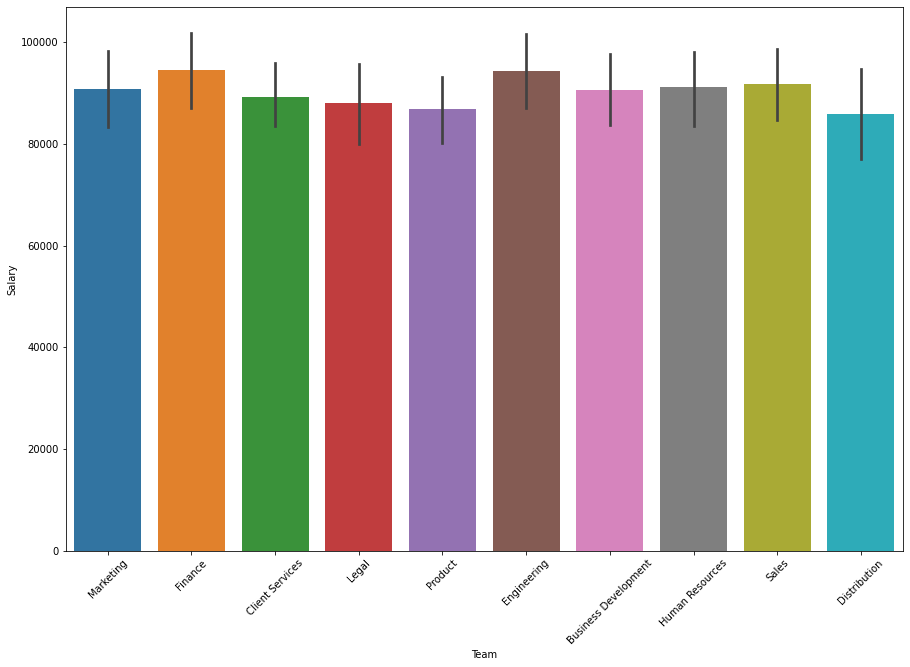

In [47]:
plt.figure(figsize = (15,10))
draw = sns.barplot(data = df, x = 'Team', y='Salary')
plt.xticks(rotation = 45);

## Hypothesis Testing

### Plot a histogram of salary.

<AxesSubplot: xlabel='Salary', ylabel='Count'>

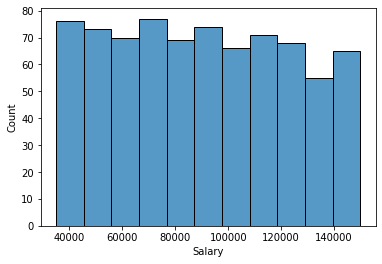

In [48]:
sns.histplot(data = df, x = 'Salary')

### Find mean, standard deviation, and count of salary.

In [49]:
pd.DataFrame(df['Salary'].agg(['mean','std','count']))

,Salary
mean,90433.196335
std,32864.665282
count,764.000000


### For all of the following Hypothesis Tests you must:
#### Define your null and alternate Hypothesis.
#### Perform z-test and t-test.
#### State which test you need (two tailed / one tailed - right or left )
#### The calculation must be performed using the Hypothesis test equations. 
#### i.e., calculate the standard error then calculate the z or t values then calculate p-value once using z-distribution and once using t-distribution.
#### Repeat using statsmodels.stats.weightstats.ztest() and scipy.stats.ttest_1samp() to confirm the obtained results.
#### Write down your conclusion (Reject H0 or not).

### The claim is that the mean salary is 90000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [50]:
from scipy.stats import norm
from scipy.stats import t
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp

In [51]:
# H0: mean(salary) = 90,000
# Ha: mean(salary) != 90,000
# two-tailed test
# alpha = 0.05 (significance level)

z = (df['Salary'].mean()-90_000)/(df['Salary'].std()/np.sqrt(df['Salary'].count()))
print('t or z value: ', z)
print('P-value using z dist: ',(1- norm.cdf(z))*2)
print('P-value using z dist: ',(1- t.cdf(z, df = df['Salary'].count()-1))*2)


# Since p-value is greater than the significance level thus can't reject null hypothesis

t or z value:  0.3643361288778422
P-value using z dist:  0.7156070241477364
P-value using z dist:  0.715707969136572


In [52]:
result = ztest(x1=df['Salary'], value = 90_000) 
print('z value: ',result[0])
print('p-value using z dist: ',result[1])

z value:  0.3643361288778422
p-value using z dist:  0.7156070241477364


In [53]:
result = ttest_1samp(a = df['Salary'], popmean = 90_000)
print('t value: ',result[0])
print('p-value using t dist: ',result[1])

t value:  0.3643361288778422
p-value using t dist:  0.7157079691365718


### The claim is that the mean salary is 100000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [54]:
# H0: mean(Salary) = 100,000
# Ha: mean(Salary) != 100,000
# its two-tailed test
# alpha = 0.05 (significance level)

z = (df['Salary'].mean()-100_000)/(df['Salary'].std()/np.sqrt(df['Salary'].count()))
print('t or z value: ', z)
print('P-value using z dist: ',(1- norm.cdf(abs(z)))*2)
print('P-value using z dist: ',(1- t.cdf(abs(z), df = df['Salary'].count()-1))*2)

# Since p-value is much less than significance level thus its statistically significant and reject the null hypothesis

t or z value:  -8.04607964280197
P-value using z dist:  8.881784197001252e-16
P-value using z dist:  3.3306690738754696e-15


In [55]:
result = ztest(x1=df['Salary'], value = 100_000) 
print('z value: ',result[0])
print('p-value using z dist: ',result[1])

z value:  -8.04607964280197
p-value using z dist:  8.548837039392978e-16


In [56]:
result = ttest_1samp(a = df['Salary'], popmean = 100_000)
print('t value: ',result[0])
print('p-value using t dist: ',result[1])

t value:  -8.04607964280197
p-value using t dist:  3.266925104077574e-15


### The claim is that the mean salary is greater than or equal to 92000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [57]:
# H0: mean(Salary) >= 92,000
# Ha: mean(Salary) < 92,000
# its left-tailed test
# alpha = 0.05 (significance level)

z_critical = norm.ppf(0.05)
print('Z critical at significance level: ', z_critical)

z = (df['Salary'].mean()-92_000)/(df['Salary'].std()/np.sqrt(df['Salary'].count()))
print('t or z value: ', z)
print('P-value using z dist: ',(1- norm.cdf(abs(z))))
print('P-value using z dist: ',(1- t.cdf(abs(z), df = df['Salary'].count()-1)))

# Since p-value is greater than significance level meaning its more likely to be by chance thus, can't reject null hyp.

Z critical at significance level:  -1.6448536269514729
t or z value:  -1.3177470254581203
P-value using z dist:  0.09379417338868268
P-value using z dist:  0.09399193010617357


In [58]:
result = ztest(x1=df['Salary'], value = 92_000, alternative='smaller') 
print('z value: ',result[0])
print('p-value using z dist: ',result[1])

z value:  -1.3177470254581203
p-value using z dist:  0.09379417338868268


In [59]:
result = ttest_1samp(a = df['Salary'], popmean = 92_000, alternative='less')
print('t value: ',result[0])
print('p-value using t dist: ',result[1])

t value:  -1.3177470254581203
p-value using t dist:  0.0939919301061736


### The claim is that the mean salary is greater than or equal to 93000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [60]:
# H0: mean(Salary) >= 93,000
# Ha: mean(Salary) < 93,000
# its left-tailed test
# alpha = 0.05 (significance level)

z_critical = norm.ppf(0.05)
print('Z critical at significance level: ', z_critical)

z = (df['Salary'].mean()-93_000)/(df['Salary'].std()/np.sqrt(df['Salary'].count()))
print('t or z value: ', z)
print('P-value using z dist: ',(1- norm.cdf(abs(z))))
print('P-value using z dist: ',(1- t.cdf(abs(z), df = df['Salary'].count()-1)))

# Since p-value is smaller than the significance level so its statistically significant thus, reject null hypothesis

Z critical at significance level:  -1.6448536269514729
t or z value:  -2.1587886026261014
P-value using z dist:  0.015433285555675469
P-value using z dist:  0.01558885238011598


In [61]:
result = ztest(x1=df['Salary'], value = 93_000, alternative='smaller') 
print('z value: ',result[0])
print('p-value using z dist: ',result[1])

z value:  -2.1587886026261014
p-value using z dist:  0.015433285555675419


In [62]:
result = ttest_1samp(a = df['Salary'], popmean = 93_000, alternative='less')
print('t value: ',result[0])
print('p-value using t dist: ',result[1])

t value:  -2.1587886026261014
p-value using t dist:  0.015588852380116005


### The claim is that the mean salary is less than or equal to 88000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [63]:
# H0: mean(Salary) <= 88,000
# Ha: mean(Salary) > 88,000
# its right-tailed test
# alpha = 0.05 (significance level)

z_critical = norm.ppf(0.95)
print('Z critical at significance level: ', z_critical)

z = (df['Salary'].mean()-88_000)/(df['Salary'].std()/np.sqrt(df['Salary'].count()))
print('t or z value: ', z)
print('P-value using z dist: ',(1- norm.cdf(abs(z))))
print('P-value using z dist: ',(1- t.cdf(abs(z), df = df['Salary'].count()-1)))

# Since p-value is smaller than the significance level so its statistically significant thus, reject null hypothesis

Z critical at significance level:  1.6448536269514722
t or z value:  2.0464192832138046
P-value using z dist:  0.02035756823028878
P-value using z dist:  0.020528674104732025


In [64]:
result = ztest(x1=df['Salary'], value = 88_000, alternative='larger') 
print('z value: ',result[0])
print('p-value using z dist: ',result[1])

z value:  2.0464192832138046
p-value using z dist:  0.020357568230288822


In [65]:
result = ttest_1samp(a = df['Salary'], popmean = 88_000, alternative='greater')
print('t value: ',result[0])
print('p-value using t dist: ',result[1])

t value:  2.0464192832138046
p-value using t dist:  0.020528674104732036


### The claim is that the mean salary is less than or equal to 90000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [66]:
# H0: mean(Salary) <= 90,000
# Ha: mean(Salary) > 90,000
# its right-tailed test
# alpha = 0.05 (significance level)

z_critical = norm.ppf(0.95)
print('Z critical at significance level: ', z_critical)

z = (df['Salary'].mean()-90_000)/(df['Salary'].std()/np.sqrt(df['Salary'].count()))
print('t or z value: ', z)
print('P-value using z dist: ',(1- norm.cdf(abs(z))))
print('P-value using z dist: ',(1- t.cdf(abs(z), df = df['Salary'].count()-1)))

# Since p-value is greater than significance level meaning its more likely to be by chance thus, can't reject null hyp.

Z critical at significance level:  1.6448536269514722
t or z value:  0.3643361288778422
P-value using z dist:  0.3578035120738682
P-value using z dist:  0.357853984568286


In [67]:
result = ztest(x1=df['Salary'], value = 90_000, alternative='larger') 
print('z value: ',result[0])
print('p-value using z dist: ',result[1])

z value:  0.3643361288778422
p-value using z dist:  0.3578035120738682


In [68]:
result = ttest_1samp(a = df['Salary'], popmean = 90_000, alternative='greater')
print('t value: ',result[0])
print('p-value using t dist: ',result[1])

t value:  0.3643361288778422
p-value using t dist:  0.3578539845682859
